Importing packages and creating the DataFrame

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Mall_Customers.csv')

Calculating average and median annual income of the customers

In [4]:
average_income = df['Annual Income (k$)'].mean()
median_income = df['Annual Income (k$)'].median()
print(f"Average annual income of customers: ${average_income}K")
print(f"Median annual income of customers: ${median_income}K")

if average_income > median_income:
    print("The data is skewed to the right")
elif average_income < median_income:
    print("The data is skewed to the left")
else:
    print("The data is normal")

Average annual income of customers: $60.56K
Median annual income of customers: $61.5K
The data is skewed to the left


Showing the number of males vs. females


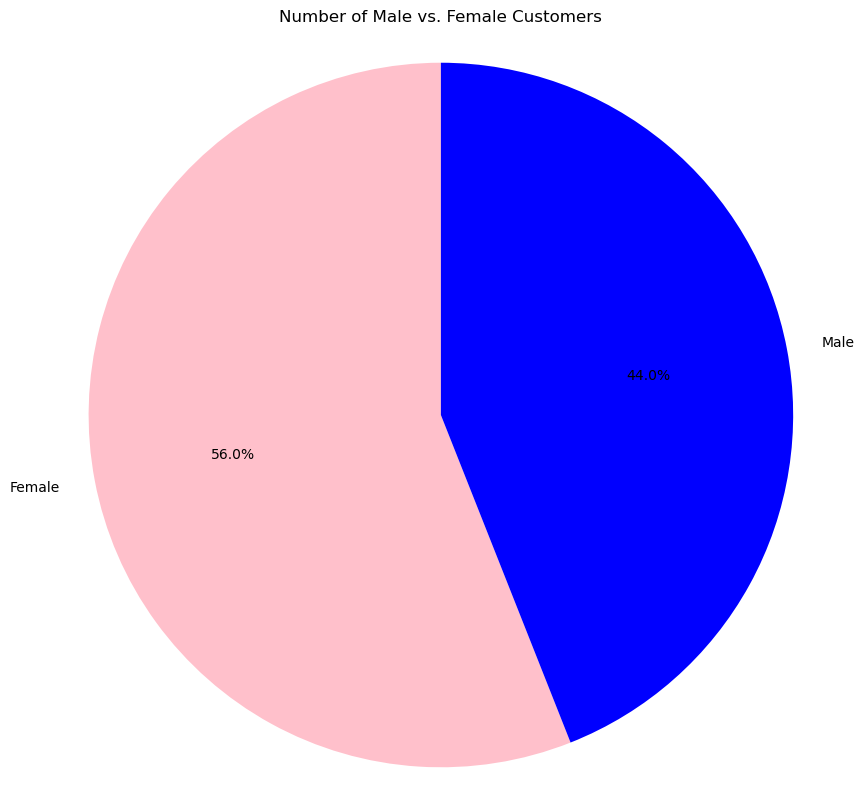

In [10]:
gender_counts = df['Genre'].value_counts()

plt.figure(figsize = (10, 10))
plt.pie(gender_counts.values, labels = gender_counts.index, autopct = '%1.1f%%', startangle = 90, colors = ['pink', 'blue'])
plt.title('Number of Male vs. Female Customers')
plt.axis('equal')

plt.show()